In [1]:
# 导入及处理数据
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import yfinance as yf

/home/jquser/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
security = 'DLR'
# 绘制数据的规模
scale = 500
# df = import_csv(security)[-scale:]
df = pd.read_csv("Data/{}.csv".format(security), index_col=0, parse_dates=True)
df = yf.download(security)
df = df.tail(200)

In [3]:
# SMA:简单移动平均(Simple Moving Average)
time_period = 20  # SMA的计算周期，默认为20
stdev_factor = 2  # 上下频带的标准偏差比例因子
history = []  # 每个计算周期所需的价格数据
sma_values = []  # 初始化SMA值
upper_band = []  # 初始化阻力线价格
lower_band = []  # 初始化支撑线价格

In [4]:
# 构造列表形式的绘图数据
for close_price in df['Close']:
    # 
    history.append(close_price)

    # 计算移动平均时先确保时间周期不大于20
    if len(history) > time_period:
        del (history[0])

    # 将计算的SMA值存入列表
    sma = np.mean(history)
    sma_values.append(sma)  
    # 计算标准差
    stdev = np.sqrt(np.sum((history - sma) ** 2) / len(history))  
    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)

In [5]:
# 将计算的数据合并到DataFrame
df = df.assign(收盘价=pd.Series(df['Close'], index=df.index))
df = df.assign(中界线=pd.Series(sma_values, index=df.index))
df = df.assign(阻力线=pd.Series(upper_band, index=df.index))
df = df.assign(支撑线=pd.Series(lower_band, index=df.index))

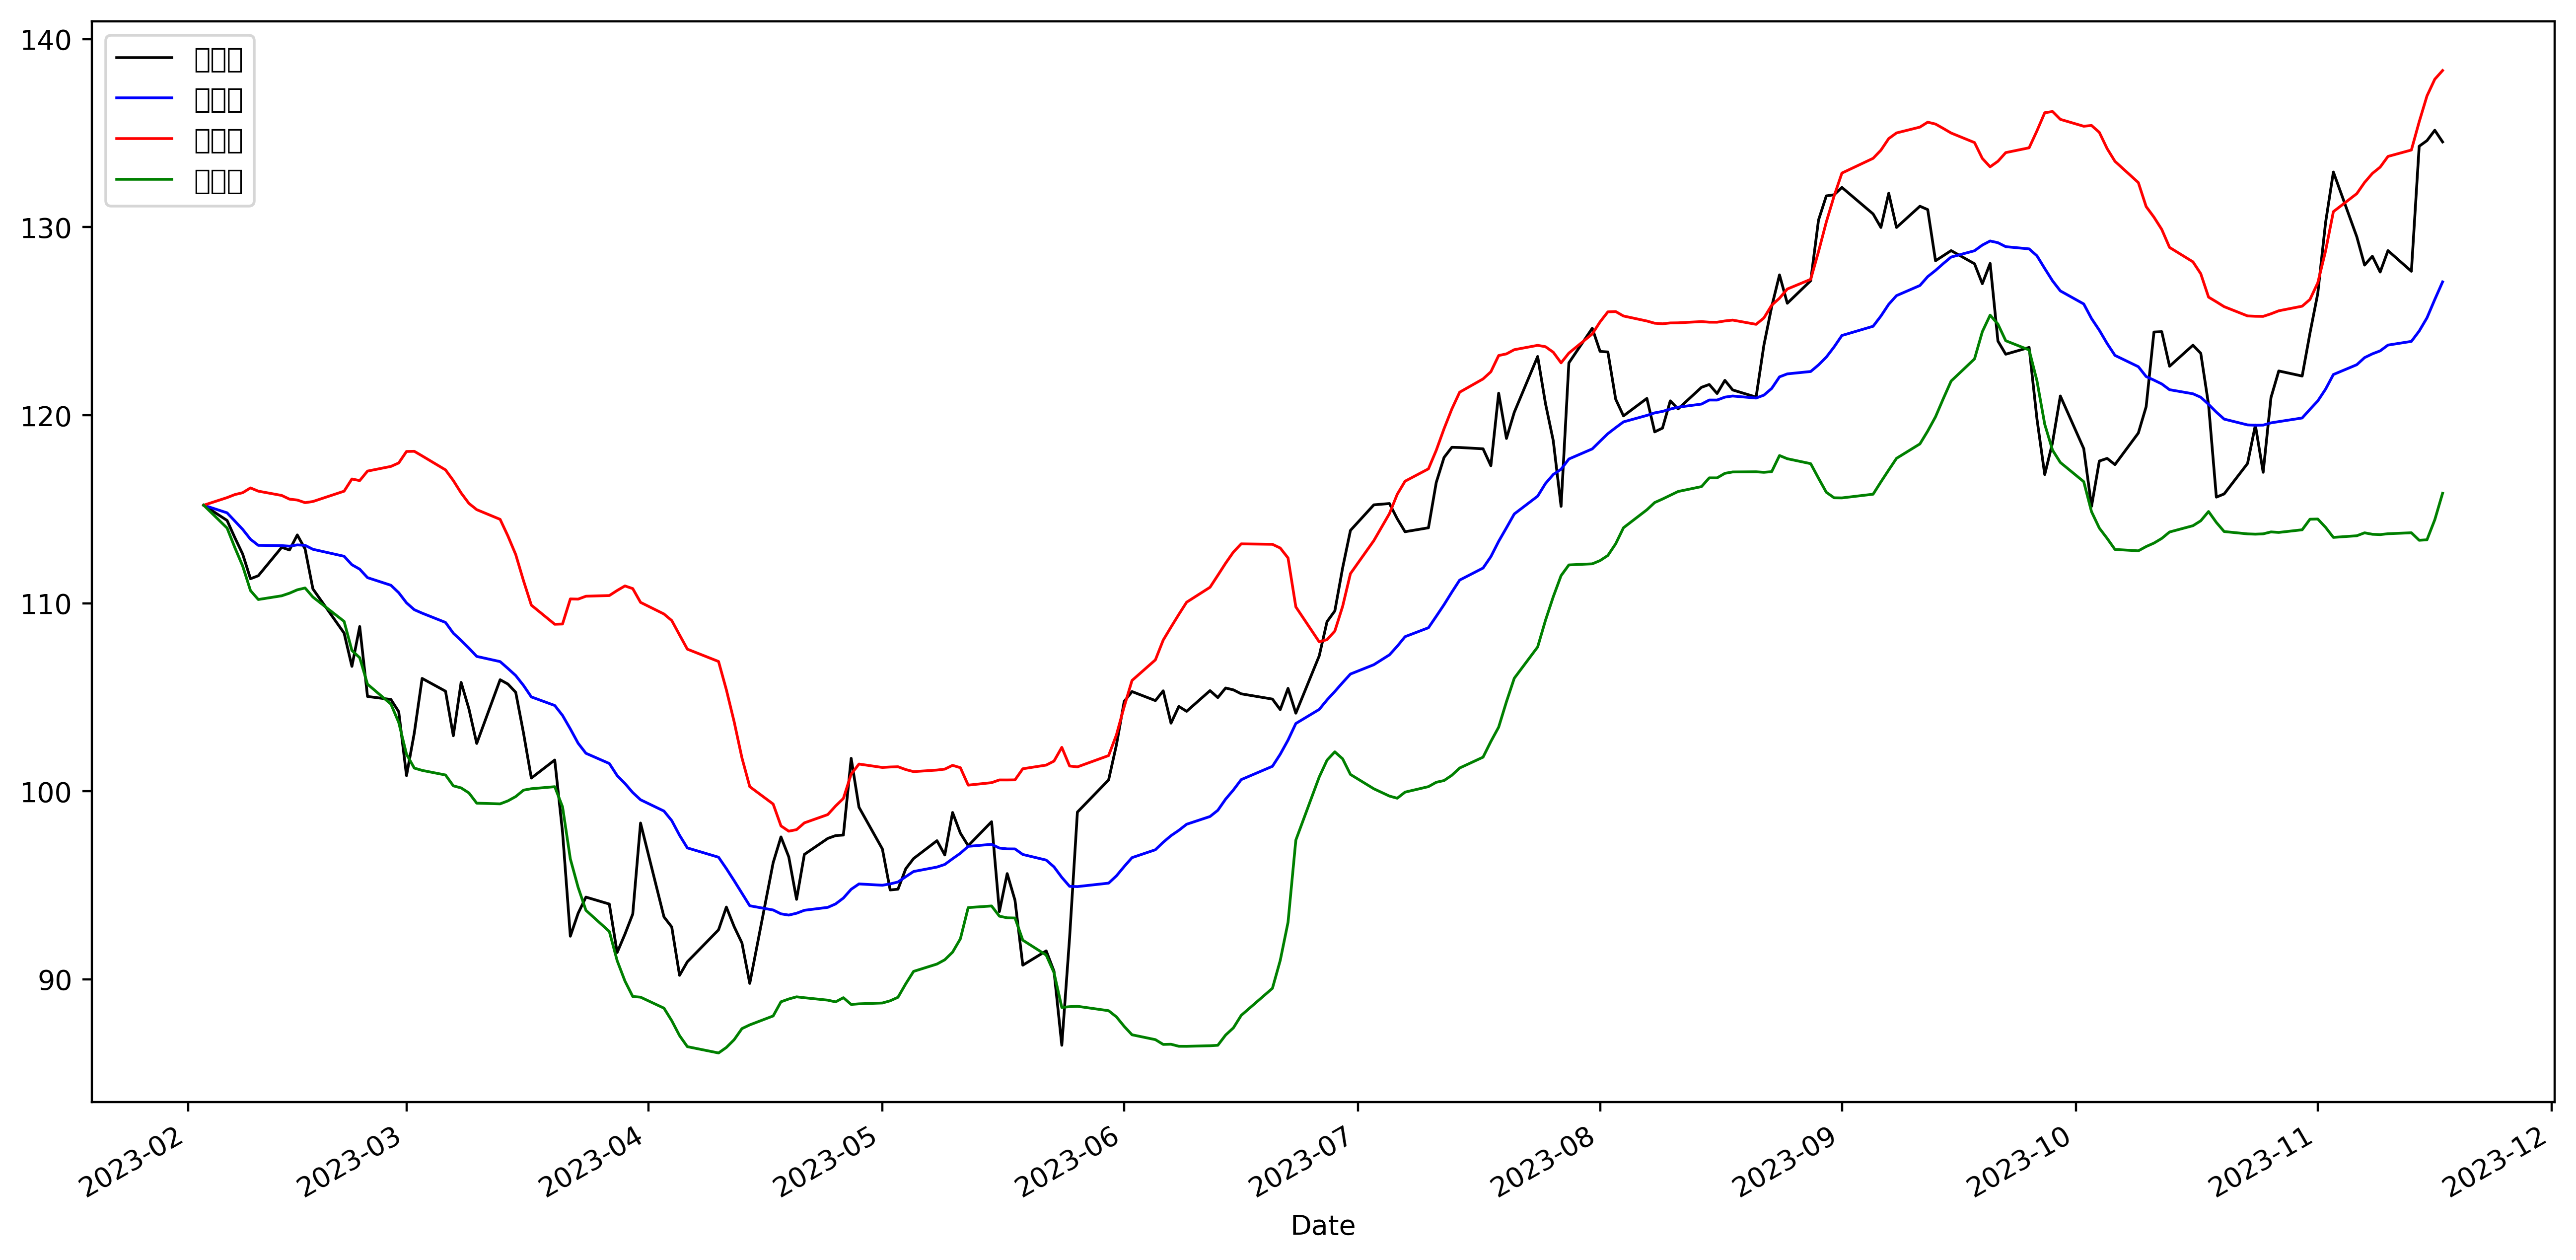

In [7]:
# 绘图
ax = plt.figure(figsize=(16,8), dpi=400)
# 设定y轴标签
ax.ylabel = '%s price in ￥' % (security)

df['收盘价'].plot(color='k', lw=1., legend=True)
df['中界线'].plot(color='b', lw=1., legend=True)
df['阻力线'].plot(color='r', lw=1., legend=True)
df['支撑线'].plot(color='g', lw=1., legend=True)
plt.show()